# Turtle Rescue Forecast Challenge


* Link:
[Turtle Rescue Forecast Challenge](https://zindi.africa/competitions/turtle-rescue-forecast-challenge/data)

* Objective: The objective of this challenge is to forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.

| Variable             | Description                                                                                                                                               |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Rescue_ID            | It’s an individual bycatch incidence identity number. The numbers are consecutive, for each year e.g. 2018_RE_0732 means rescue number 732 in year 2018 | 
| Date_TimeCaught      | Date the turtle is captured e.g. 06/01/ |2018                                                                                                                |
| Researcher           | Name of bycatch officer(s) involved with specific rescue                                                                                                   |
| Capture Site         | Area where turtle was captured, as reported by the fisher.                                                                                                 |
| Foraging Ground      | General area of ocean area where turtle was captured. The assumption is that the turtle was foraging where it was captured.                               |
| Capture Method       | Fishing gear or method used by fishers to capture the turtle                                                                                               |
| Fisher               | Name of the fisher who captured the turtle                                                                                                                 |
| Landing_Site         | Section of beach where turtle is landed.                                                                                                                  |
| Species              | Species of turtle (e.g. green turtle, hawksbill, loggerhead etc.)                                                                                          |
| Tag_1                | Individual / unique number used to identify a turtle. Each turtle that is captured is tagged.                                                            |
| Tag_2                | Second tag added to large turtles. Turtles with two tags: tag 1 is an odd number e.g. KEL0169 and tag 2 is even and consequent e.g. KEL0170                |
| Lost_Tags            | Replaced tags. If a turtle has outgrown its tag, the tag is removed and replaced with a bigger one, with a different number                              |
| T_Number             | It a number given to a turtle that has been taken to the rehabilitation facility (TRC) for treatment.                                                    |
| CCL_cm               | Central Carapace Length (Biometric measurement). Measured in centimetres                                                                                  |
| CCW_cm               | Central Carapace Width (Biometric measurement). Measured in centimetres                                                                                    |
| Weight_Kg            | (Biometric measurement). Measured in Kgs                                                                                                                   |
| Sex                  | Gender of the turtle.                                                                                                                                     |
| Turtle Characteristics | Description of turtles (mostly unusual occurrences e.g. disease, injury, parasites etc. Usually as short textual description                               |
| Status               | Indicates whether the turtle is released or admitted to TRC                                                                                                |
| Release Site         | Site where the turtle is released                                                                                                                          |
| Date_Release         | Date turtle is released                                                                                                                                    |
| Release_Admiss_Notes | Additional information about release                                                                                                                      |
| SpecialRemarks       | Additional info (General) about turtle                                                                                                                     |


## Set-up and Import

Terminal: 
'make setup'

In [149]:
#!pip install ydata_profiling
#!pip install missingno

In [150]:
#!pip freeze > requirements.txt

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

import missingno as msno




In [152]:
#! pip install ydata-profiling --upgrade

## Table 1: capturesite_category

In [153]:
# Turtles dataset - CaptureSite_category.csv
df_capturesite_category = pd.read_csv('./data/CaptureSite_category.csv')
df_capturesite_category.head()

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


In [154]:
df_capturesite_category.shape

(29, 3)

In [155]:
# Different categories of CaptureSite
df_capturesite_category['CaptureSite'].unique()


array(['CaptureSite_0', 'CaptureSite_1', 'CaptureSite_10',
       'CaptureSite_11', 'CaptureSite_12', 'CaptureSite_13',
       'CaptureSite_14', 'CaptureSite_15', 'CaptureSite_16',
       'CaptureSite_17', 'CaptureSite_18', 'CaptureSite_19',
       'CaptureSite_2', 'CaptureSite_20', 'CaptureSite_21',
       'CaptureSite_22', 'CaptureSite_23', 'CaptureSite_24',
       'CaptureSite_25', 'CaptureSite_26', 'CaptureSite_27',
       'CaptureSite_28', 'CaptureSite_3', 'CaptureSite_4',
       'CaptureSite_5', 'CaptureSite_6', 'CaptureSite_7', 'CaptureSite_8',
       'CaptureSite_9'], dtype=object)

In [156]:
print('Classification of CaptureSite categories: ', len(df_capturesite_category['CaptureSite'].unique()))


Classification of CaptureSite categories:  29


In [157]:
df_capturesite_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CaptureSite          29 non-null     object
 1   CaptureSiteCategory  29 non-null     object
 2   Type                 29 non-null     object
dtypes: object(3)
memory usage: 828.0+ bytes


## Table 2: sample

In [158]:
# Turtles dataset - Sample_sub.csv
df_sample_sub = pd.read_csv('./data/Sample_sub.csv')
df_sample_sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [159]:
df_sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1276 non-null   object
 1   Capture_Number  1276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


## Table 3: train

In [160]:
# Turtles dataset - train.csv
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [161]:
df_train.tail()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
18057,2018_RE_1511,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_569,LandingSite_CaptureSiteCategory_1,Species_5,KES1828,...,NaN,NaN,57.13,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,18/12/18
18058,2018_RE_1514,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_125,LandingSite_CaptureSiteCategory_1,Species_6,KES0563,...,KES0416,NaN,42.07,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacle...,Released,ReleaseSite_68,18/12/18
18059,2018_RE_1532,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1343,LandingSite_CaptureSiteCategory_1,Species_5,KES1833,...,NaN,NaN,57.20,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,24/12/18
18060,2018_RE_1533,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_5,KES1831,...,NaN,NaN,51.90,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra mis...,Released,ReleaseSite_68,24/12/18
18061,2018_RE_1550,2018-12-28,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_6,KES1432,...,NaN,NaN,34.60,31.20,4.29,Unknown,Thick pink patches of calcareous algae on cara...,Released,ReleaseSite_37,28/12/18


In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rescue_ID              18062 non-null  object 
 1   Date_TimeCaught        18062 non-null  object 
 2   Researcher             18062 non-null  object 
 3   CaptureSite            18062 non-null  object 
 4   ForagingGround         18062 non-null  object 
 5   CaptureMethod          18062 non-null  object 
 6   Fisher                 18062 non-null  object 
 7   LandingSite            18062 non-null  object 
 8   Species                18062 non-null  object 
 9   Tag_1                  17937 non-null  object 
 10  Tag_2                  4911 non-null   object 
 11  Lost_Tags              925 non-null    object 
 12  T_Number               38 non-null     object 
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  We

## Preprocessing

In [163]:
# Merge table df_train and df_capturesite_categoryn on 'CaptureSite'

df_train = pd.merge(df_train, df_capturesite_category, on='CaptureSite', how='left')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1


<Axes: >

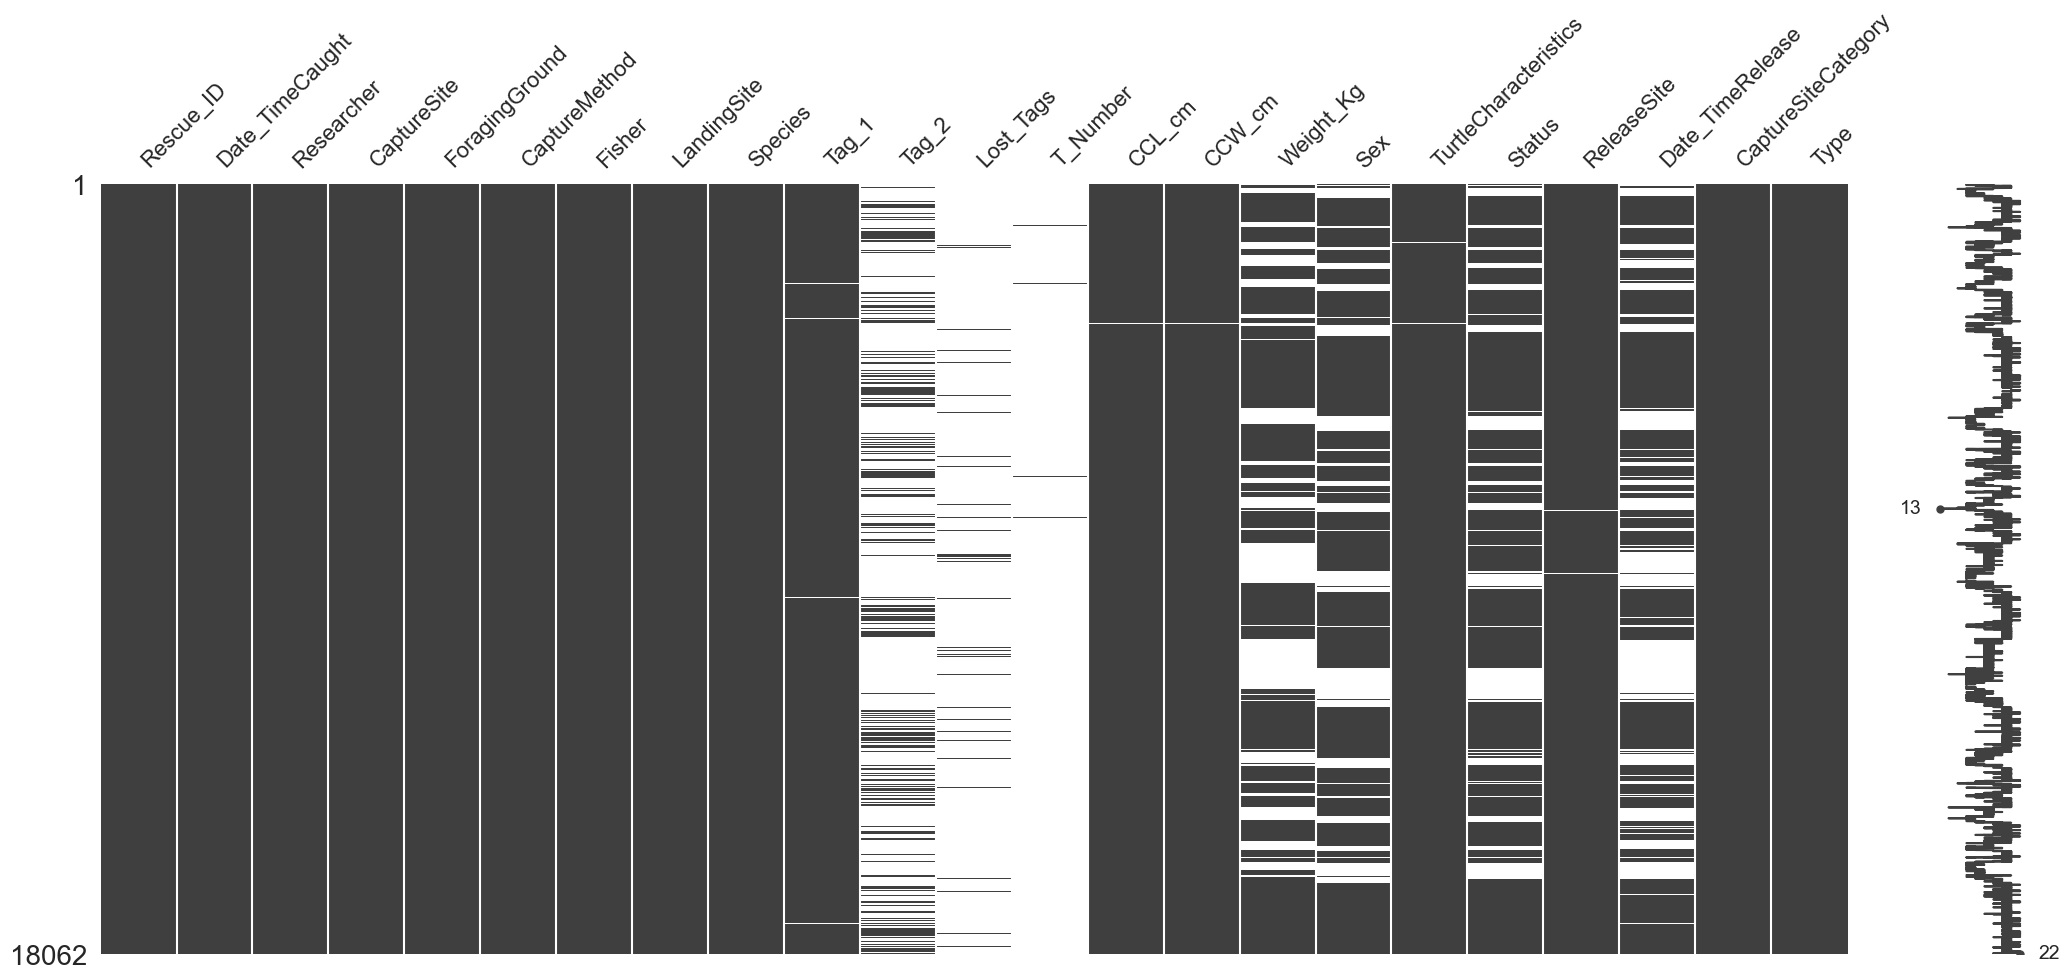

In [164]:
msno.matrix(df_train)

## Dropping columns with too many missing values: t_number, tag2, lost_tags

In [165]:
# Drop columns 'CaptureSite' and 'CaptureSite_category'
df_train = df_train.drop(['T_Number', 'Lost_Tags', 'Tag_2'], axis=1)
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1


## Transform date to datetime format

In [166]:
# Transform 'Date_TimeCaught' column to datetime format
df_train['Date_TimeCaught'] = pd.to_datetime(df_train['Date_TimeCaught'])

#create new columns for year and week of year, year_woy (year and week of year combined)
df_train["year"]=df_train.Date_TimeCaught.dt.year
df_train["week_of_year"]=df_train.Date_TimeCaught.dt.isocalendar().week
df_train["year_woy"]=df_train.year*100+df_train.week_of_year

df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


In [167]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rescue_ID              18062 non-null  object        
 1   Date_TimeCaught        18062 non-null  datetime64[ns]
 2   Researcher             18062 non-null  object        
 3   CaptureSite            18062 non-null  object        
 4   ForagingGround         18062 non-null  object        
 5   CaptureMethod          18062 non-null  object        
 6   Fisher                 18062 non-null  object        
 7   LandingSite            18062 non-null  object        
 8   Species                18062 non-null  object        
 9   Tag_1                  17937 non-null  object        
 10  CCL_cm                 18038 non-null  float64       
 11  CCW_cm                 18035 non-null  float64       
 12  Weight_Kg              12653 non-null  float64       
 13  S

## Group by week and capturesite

In [168]:
# groupby year/ capture site  
df_train.groupby(['year_woy', 'CaptureSite'])
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


## Define the target

In [169]:
# Grouping and counting
Target=df_train.groupby(["year_woy","CaptureSite"]).CaptureSite.count().rename("Number_Turtles").reset_index()

df_train.head()


,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


In [170]:
Target.head()

,year_woy,CaptureSite,Number_Turtles
0,199816,CaptureSite_27,1
1,199828,CaptureSite_11,1
2,199832,CaptureSite_11,1
3,199832,CaptureSite_27,1
4,199839,CaptureSite_11,2


In [171]:
# Merge table df_train and df_capturesite_categoryn on 'CaptureSite'

df_train_final = pd.merge(df_train, Target, on=['year_woy', 'CaptureSite'], how='left')
df_train_final.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy,Number_Turtles
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051,1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143,1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144,1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211,1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232,2


In [172]:
df_train_final.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'CCL_cm', 'CCW_cm', 'Weight_Kg', 'Sex',
       'TurtleCharacteristics', 'Status', 'ReleaseSite', 'Date_TimeRelease',
       'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy',
       'Number_Turtles'],
      dtype='object')

In [173]:
df_train_final.shape

(18062, 24)

<Axes: >

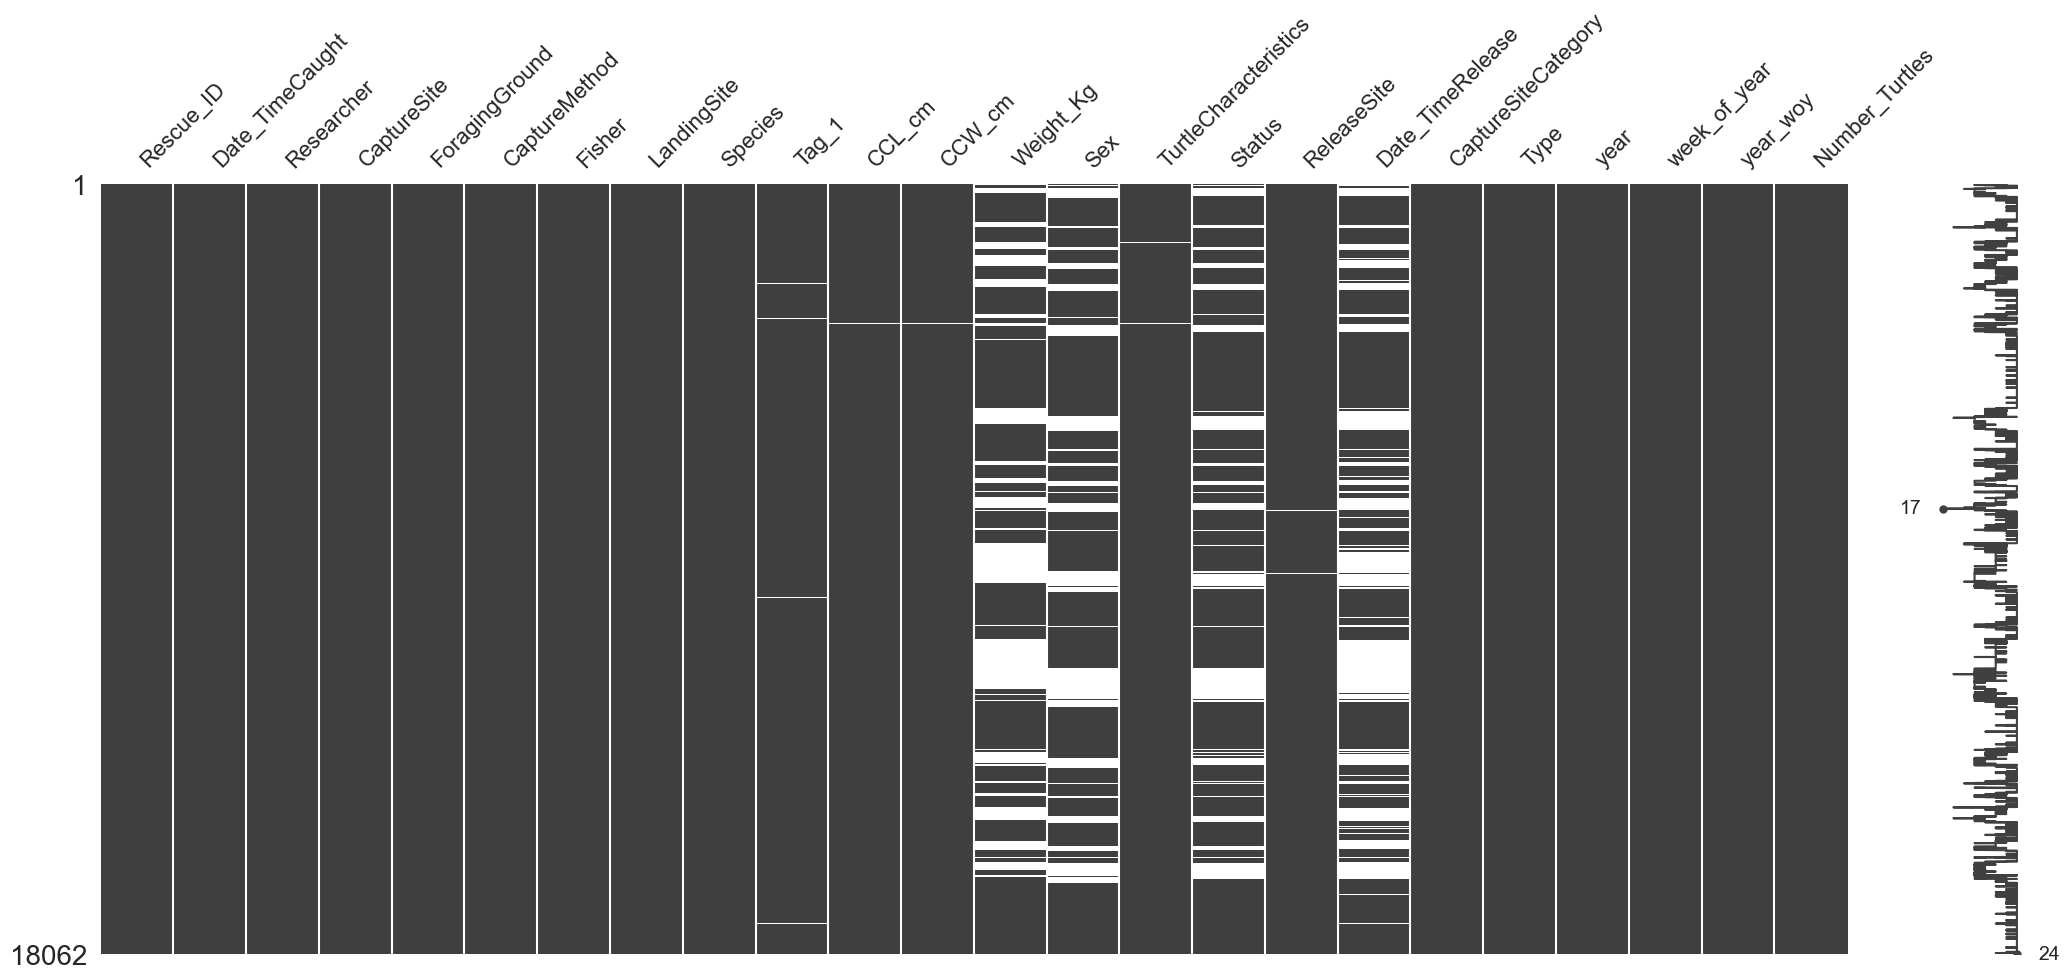

In [174]:
msno.matrix(df_train_final)

#### dropping columns with too many unique values before one hot encoding
**! I dropped Date_TimeCaught because RandomForestRegressor cannot deal with datetime format !**

In [175]:
#dropping unneccesary columns 
df_final = df_train_final.drop(['Rescue_ID', 'Researcher', 'Fisher','Tag_1','TurtleCharacteristics', 'ReleaseSite', 'Date_TimeRelease', 'Date_TimeCaught', 'CCL_cm', 'CCW_cm', 'Weight_Kg', 'LandingSite'], axis=1)

In [176]:
df_final.head()

,CaptureSite,ForagingGround,CaptureMethod,Species,Sex,Status,CaptureSiteCategory,Type,year,week_of_year,year_woy,Number_Turtles
0,CaptureSite_0,Ocean,Net,Species_6,Unknown,Released,CaptureSiteCategory_2,Type_1,2000,51,200051,1
1,CaptureSite_0,Ocean,Net,Species_6,Unknown,Released,CaptureSiteCategory_2,Type_1,2001,43,200143,1
2,CaptureSite_0,Ocean,Net,Species_5,Unknown,Released,CaptureSiteCategory_2,Type_1,2001,44,200144,1
3,CaptureSite_0,Ocean,Net,Species_6,Unknown,Released,CaptureSiteCategory_2,Type_1,2002,11,200211,1
4,CaptureSite_0,Ocean,Beached,Species_5,Unknown,Released,CaptureSiteCategory_2,Type_1,2002,32,200232,2


In [177]:
df_final.dtypes


CaptureSite            object
ForagingGround         object
CaptureMethod          object
Species                object
Sex                    object
Status                 object
CaptureSiteCategory    object
Type                   object
year                    int32
week_of_year           UInt32
year_woy                Int64
Number_Turtles          int64
dtype: object

In [178]:
df_final.CaptureSite = df_final.CaptureSite.str.split(pat = "_", expand=True)[1]


In [179]:
df_final.CaptureSite = df_final.CaptureSite.astype(int)

In [180]:
df_final.dtypes

CaptureSite             int64
ForagingGround         object
CaptureMethod          object
Species                object
Sex                    object
Status                 object
CaptureSiteCategory    object
Type                   object
year                    int32
week_of_year           UInt32
year_woy                Int64
Number_Turtles          int64
dtype: object

# Split train-test

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
RSEEED = 42

In [236]:
# Define features and target
X = df_final.drop(['Number_Turtles'], axis=1)

y = df_final['Number_Turtles']

In [237]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [238]:
features = list(X_train.columns)

## Fill missing values - Nan
for our RandomForestRegressor we need to fill the missing values
Missing Value Imputation: missing value imputation separately for both X_train and X_test

### X_train filling in missing values


In [185]:
#checking isnull values
X_train.isnull().sum()

CaptureSite               0
ForagingGround            0
CaptureMethod             0
Species                   0
Sex                    3503
Status                 2939
CaptureSiteCategory       0
Type                      0
year                      0
week_of_year              0
year_woy                  0
dtype: int64

In [186]:
X_train.Sex.value_counts()

Sex
Unknown         10826
Female             85
Male               33
Not_Recorded        2
Name: count, dtype: int64

In [187]:
#fill missing values of Sex with Unknown
X_train.Sex.fillna('Unknown', inplace=True)

In [188]:
X_train.Status.value_counts()

Status
Released                                    10858
Admitted                                      226
Not_Recorded                                   20
 green algae on carapace                        7
 no other major characteristics                 6
                                            ...  
 notch btw 9/10RMS & on 11RMS & 9LMS            1
 green algae on rear carapace                   1
 light flaking on shell& sm b on L supra        1
 small Bs on shoulder and 3rd CS                1
 tip of supras damaged                          1
Name: count, Length: 361, dtype: int64

In [189]:
X_train.Status.fillna('Not_Recorded', inplace=True)

<Axes: >

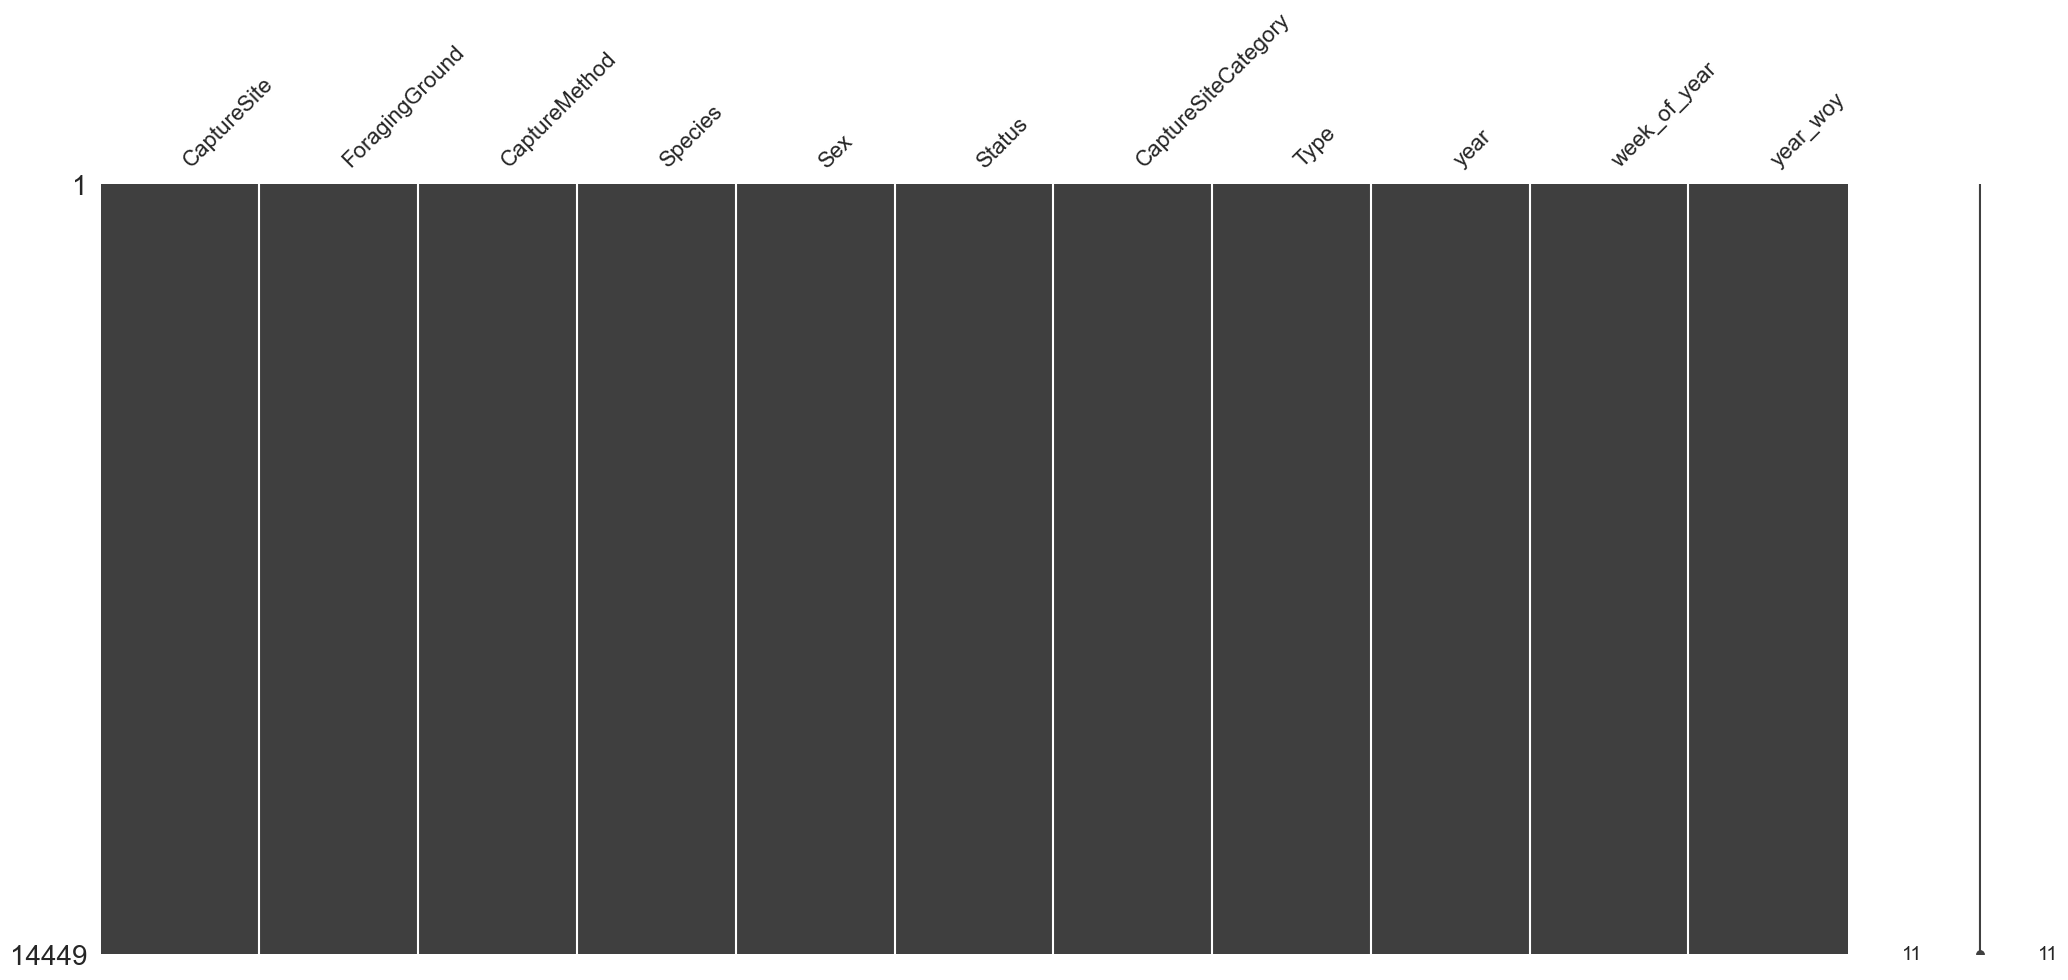

In [190]:
msno.matrix(X_train)

### X_test filling in missing values

In [191]:
#we have an outlier, so lets use the median to fill the missing values
#X_test.Weight_Kg.fillna(X_test.Weight_Kg.median(), inplace=True)
#fill missing values of Sex with Unknown
X_test.Sex.fillna('Unknown', inplace=True)
X_test.Status.fillna('Not_Recorded', inplace=True)
#then fill in missing values with median per species
#X_test.CCL_cm.fillna(X_test.groupby('Species').CCL_cm.transform('median'), inplace=True)
#X_test.CCW_cm.fillna(X_test.groupby('Species').CCW_cm.transform('median'), inplace=True)

## Get dummies

In [192]:
# this was to try out feature encoding, but it did not improve the model
"""from sklearn.base import BaseEstimator, TransformerMixin

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoding = {}

    def fit(self, X, y=None):
        for column in X.columns:
            self.encoding[column] = X[column].value_counts().to_dict()
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for column in X.columns:
            X_encoded[column] = X[column].map(self.encoding[column]).fillna(0)
        return X_encoded"""


'from sklearn.base import BaseEstimator, TransformerMixin\n\nclass FrequencyEncoder(BaseEstimator, TransformerMixin):\n    def __init__(self):\n        self.encoding = {}\n\n    def fit(self, X, y=None):\n        for column in X.columns:\n            self.encoding[column] = X[column].value_counts().to_dict()\n        return self\n\n    def transform(self, X):\n        X_encoded = X.copy()\n        for column in X.columns:\n            X_encoded[column] = X[column].map(self.encoding[column]).fillna(0)\n        return X_encoded'

In [193]:
# this was to try out feature encoding, but it did not improve the model
"""import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


# Assuming your dataset is in a DataFrame X_train and X_test

# List of non-numeric columns to frequency encode
features_not_numerical = ['CaptureSite', 'ForagingGround', 'CaptureMethod', 'Species', 'Sex', 'Status',
                          'CaptureSiteCategory', 'Type']

# Create a ColumnTransformer with a Pipeline for frequency encoding
feature_transformer = ColumnTransformer([
    ('frequency_encoding', FrequencyEncoder(), features_not_numerical), 
    ('standard_scaler', StandardScaler(), ['year', 'week_of_year', 'year_woy'])  # Standardize numeric columns
], remainder='passthrough')  # Keep the remaining numeric columns

# Fit and transform the training data
x_train_trans = feature_transformer.fit_transform(X_train)

# Transform the test data using the same transformation
x_test_trans = feature_transformer.transform(X_test)"""


"import pandas as pd\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import StandardScaler\n\n\n# Assuming your dataset is in a DataFrame X_train and X_test\n\n# List of non-numeric columns to frequency encode\nfeatures_not_numerical = ['CaptureSite', 'ForagingGround', 'CaptureMethod', 'Species', 'Sex', 'Status',\n                          'CaptureSiteCategory', 'Type']\n\n# Create a ColumnTransformer with a Pipeline for frequency encoding\nfeature_transformer = ColumnTransformer([\n    ('frequency_encoding', FrequencyEncoder(), features_not_numerical), \n    ('standard_scaler', StandardScaler(), ['year', 'week_of_year', 'year_woy'])  # Standardize numeric columns\n], remainder='passthrough')  # Keep the remaining numeric columns\n\n# Fit and transform the training data\nx_train_trans = feature_transformer.fit_transform(X_train)\n\n# Transform the test data using the same transformation\nx_test_trans = feature_transformer.transform(X_test)"

In [239]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# List of non-numeric columns to one-hot encode
features_not_numerical = ['CaptureSite', 'ForagingGround', 'CaptureMethod', 'Species', 'Sex', 'Status',
                          'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy']

# Create a ColumnTransformer with a Pipeline
feature_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(sparse=False, handle_unknown='ignore'), features_not_numerical), 
], remainder='drop')  # Use 'passthrough' to keep the remaining numeric columns

# Fit and transform the training data
x_train_trans = feature_transformer.fit_transform(X_train)

# Transform the test data using the same transformation
x_test_trans = feature_transformer.transform(X_test)

# Apply MinMaxScaler to the one-hot encoded features
#scaler = MinMaxScaler()
#x_train_trans = scaler.fit_transform(x_train_encoded)
#x_test_trans = scaler.transform(x_test_encoded)


In [240]:
x_train_trans.shape


(14449, 1492)

## Normalizing the data

In [241]:
# Import sklearn.preprocessing.StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler


mm_scaler = MinMaxScaler()
x_train_trans = mm_scaler.fit_transform(x_train_trans)
x_test_trans = mm_scaler.transform(x_test_trans )


**normalizing didn't improve the models, maybe leave out next time**

### function for metric comparison

In [197]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [198]:
def print_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Baseline: RSME Dummy Regressor:", round(np.sqrt(mean_squared_error(y_test,y_pred_dr)), 2)) 
    print("Mean Absolute Error (MAE):", round(mae, 2))
    print("Mean Squared Error (MSE):", round(mse, 2))
    print("Root Mean Squared Error (RMSE):", round(rmse, 2))
    print("R-squared (R2) Score:", round(r2, 2))

In [199]:
# function for only rmse
def print_rmse(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Root Mean Squared Error (RMSE):", round(rmse, 2))

# Baseline Model: DummyRegressor

In [242]:
#Baseline model on One-Hot encoded data
from sklearn.dummy import DummyRegressor

dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(x_train_trans, y_train)
y_pred_dr = dummy_mean.predict(x_test_trans)


print_metrics(y_test, y_pred_dr)

Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 2.82
Mean Squared Error (MSE): 14.57
Root Mean Squared Error (RMSE): 3.82
R-squared (R2) Score: -0.0


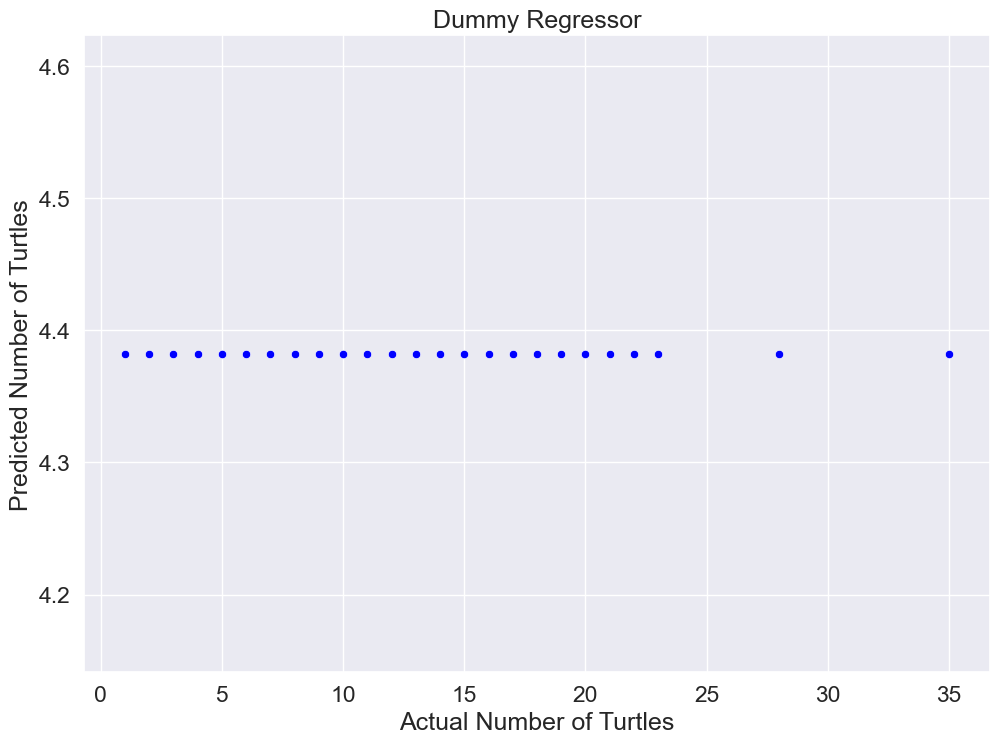

In [201]:
#vizualize baseline model: DummyRegressor

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

sns.scatterplot(x=y_test, y=y_pred_dr, color='blue')
plt.xlabel('Actual Number of Turtles')
plt.ylabel('Predicted Number of Turtles')
plt.title('Dummy Regressor')
plt.show()


# Model 1: Random Forest

In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create and train the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here
random_forest_regressor.fit(x_train_trans, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_regressor.predict(x_test_trans)

print_metrics(y_test, y_pred_rf)

Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 0.34
Mean Squared Error (MSE): 0.37
Root Mean Squared Error (RMSE): 0.61
R-squared (R2) Score: 0.97


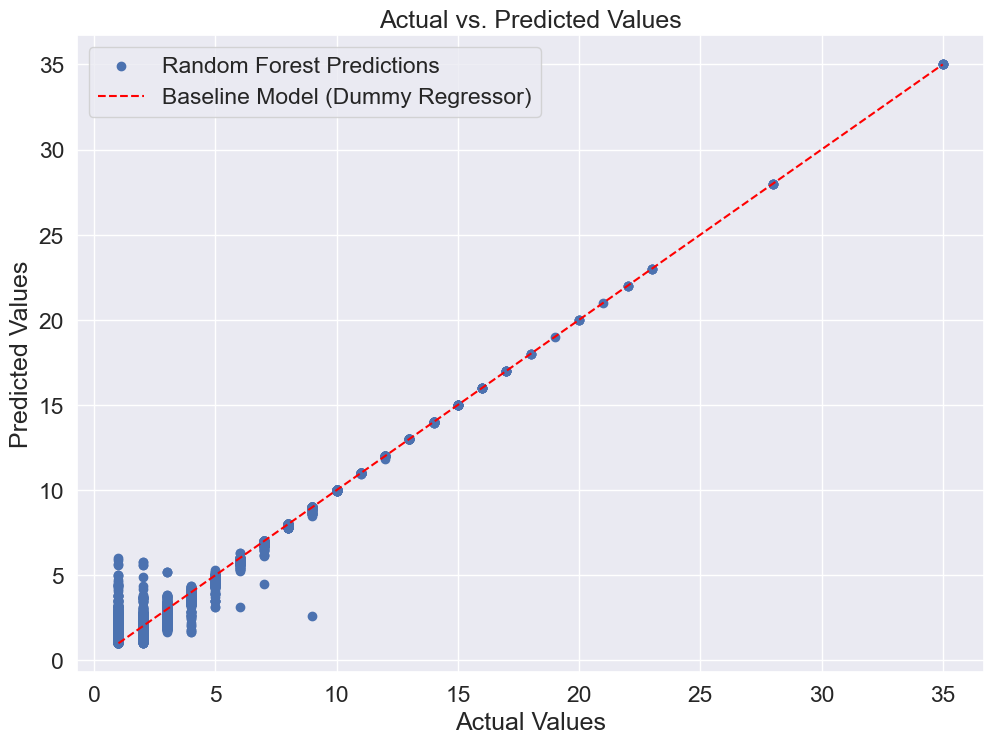

In [203]:
# Plot the baseline model line and actual vs. predicted values

# Calculate the range of values for the baseline model
y_min = min(min(y_test), min(y_pred_dr))
y_max = max(max(y_test), max(y_pred_dr))

# Create a sequence of values for the baseline model line
baseline_line = np.linspace(y_min, y_max, 100)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_rf, label='Random Forest Predictions')
plt.plot(baseline_line, baseline_line, color='red', linestyle='--', label='Baseline Model (Dummy Regressor)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


In [204]:
# Print average number of nodes and maximum depth
n_nodes = []
max_depths = []

for ind_tree in random_forest_regressor.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    and_before_hyperparameter_tuning = int(np.mean(n_nodes))
    amd_before_hyperparameter_tuning = int(np.mean(max_depths))
    
print(f'Before hyperparameter tuning:')
print(f'Average number of nodes:', and_before_hyperparameter_tuning)
print(f'Average maximum depth:', amd_before_hyperparameter_tuning)

Before hyperparameter tuning:
Average number of nodes: 6449
Average maximum depth: 242


#### feature importance

In [205]:
#fi = pd.DataFrame({'feature': features,
#                   'importance': random_forest_regressor.feature_importances_}).\
#                    sort_values('importance', ascending = False)
#fi.head()

#### hyperparameter tuning with RandomizedSearchCV

In [206]:
#define RSEED
RSEED = 42

In [207]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestRegressor(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'neg_mean_squared_error', cv = 3, 
                        n_iter = 20, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(x_train_trans, y_train)
print(rs.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/janicepelzer/Documents/neuefische/day28-Ninja-Turtles/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/janicepelzer/Documents/neuefische/day28-Ninja-Turtles/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/janicepelzer/Documents/neuefische/day28-Ninja-Turtles/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

{'n_estimators': 196, 'min_samples_split': 10, 'max_leaf_nodes': 49, 'max_features': 0.7, 'max_depth': 17, 'bootstrap': True}


In [208]:
best_model = rs.best_estimator_

In [209]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'After hyperparameter tuning:')    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')


After hyperparameter tuning:
Average number of nodes 97
Average maximum depth 15


In [210]:
y_pred_test_rs = best_model.predict(x_test_trans)

print_metrics(y_test, y_pred_test_rs)

Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 1.88
Mean Squared Error (MSE): 5.92
Root Mean Squared Error (RMSE): 2.43
R-squared (R2) Score: 0.59


## Tuning Model 1 by Stacking

In [211]:
# Import necessary libraries
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler

# Step 2: Stacking using StackingRegressor
# Define base models (you can add more if needed)
base_models = [
    ('RandomForest1', RandomForestRegressor(random_state=42, n_jobs=-1)),
    ('RandomForest2', RandomForestRegressor(random_state=123, n_jobs=-1)),
    ('RandomForest3', RandomForestRegressor(random_state=456, n_jobs=-1)),
    # Add more base models here
]

# Define the meta-model (linear regression in this case)
meta_model = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit the stacking regressor on the training data
stacking_regressor.fit(x_train_trans, y_train)

# Make predictions with the stacking regressor
y_pred_stacking = stacking_regressor.predict(x_test_trans)

# Evaluate the stacking model
stacking_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
print("\nStacking Regressor:")
print_metrics(y_test, y_pred_stacking)



Stacking Regressor:
Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 0.35
Mean Squared Error (MSE): 0.37
Root Mean Squared Error (RMSE): 0.6
R-squared (R2) Score: 0.97


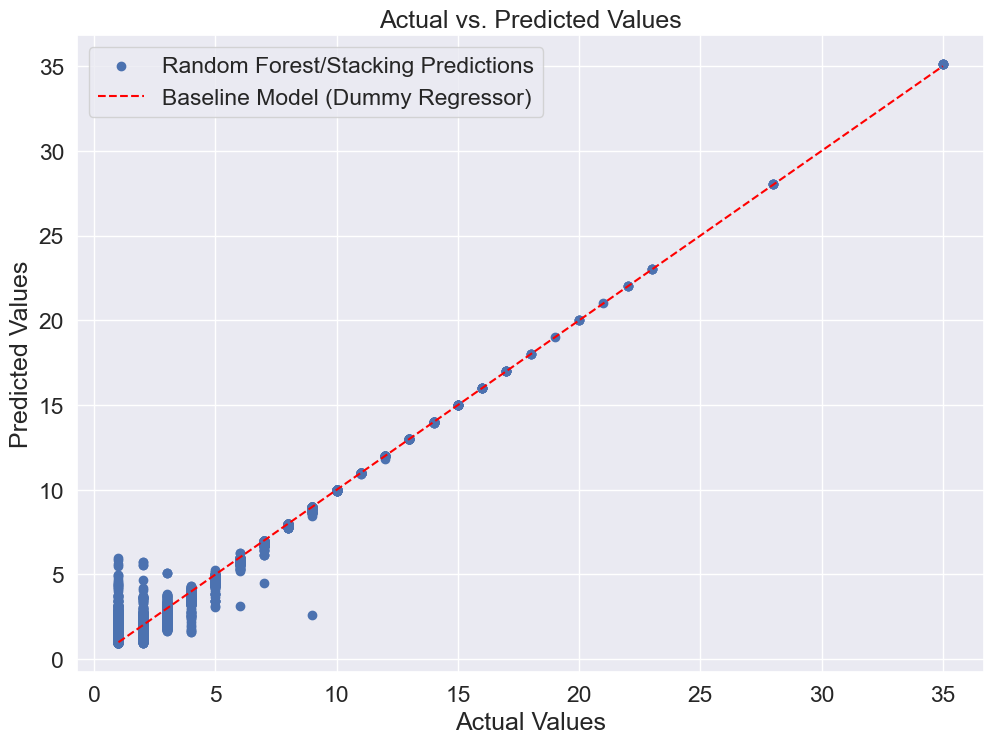

In [266]:
# Plot the baseline model line and actual vs. predicted values

# Calculate the range of values for the baseline model
y_min = min(min(y_test), min(y_pred_dr))
y_max = max(max(y_test), max(y_pred_dr))

# Create a sequence of values for the baseline model line
baseline_line = np.linspace(y_min, y_max, 100)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_stacking, label='Random Forest/Stacking Predictions')
plt.plot(baseline_line, baseline_line, color='red', linestyle='--', label='Baseline Model (Dummy Regressor)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


# Model: Linear Regression (won't use, bad RMSE)

In [212]:
#train model
linreg = LinearRegression()
linreg.fit(x_train_trans, y_train)
y_pred_linreg = linreg.predict(x_test_trans)
#print('Linear Regression root mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred3, squared=False)))
print_metrics(y_test, y_pred_linreg)

Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 92811016131.38
Mean Squared Error (MSE): 1.0976459223853913e+24
Root Mean Squared Error (RMSE): 1047685984627.74
R-squared (R2) Score: -7.541115603748934e+22


# Model 2: Ridge Regression

In [214]:
from sklearn.linear_model import Ridge

#### function for coefficient comparison

In [215]:
def coeff_info(model):
    coeff_used = np.sum(model.coef_!=0)
    print('The model is using', coeff_used, 'out of 66 features.')
    print( "The highest coefficient has a value of:", max(model.coef_.round(3)))

I checked also alpha = 10 and 1, but alpha=0.1 was the 'best'

In [216]:
# initialize and train model with alpha = 0.1
ridge_01 = Ridge(alpha=0.1)
ridge_01.fit(x_train_trans, y_train)

# predict on test-set
y_pred_ridge_01 = ridge_01.predict(x_test_trans)
y_pred_train_01 = ridge_01.predict(x_train_trans)


print_metrics(y_test, y_pred_ridge_01)
print("Train RMSE:", round(np.sqrt(mean_squared_error(y_train, y_pred_train_01)), 3))


Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 1.99
Mean Squared Error (MSE): 7.15
Root Mean Squared Error (RMSE): 2.67
R-squared (R2) Score: 0.51
Train RMSE: 2.59


In [217]:
coeff_info(ridge_01)

The model is using 1490 out of 66 features.
The highest coefficient has a value of: 18.286


# Model 3: Lasso Regression

In [222]:
from sklearn.linear_model import Lasso

In [223]:
# initialize and train model with alpha 0.05

lasso_005 = Lasso(alpha=0.05, max_iter=100000)
lasso_005.fit(x_train_trans,y_train)

# predict on test-set
y_pred_lasso_005 = lasso_005.predict(x_test_trans)
y_pred_train_lasso_005 = lasso_005.predict(x_train_trans)


print_metrics(y_test, y_pred_lasso_005)
print("Train RMSE:", round(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso_005)), 3))


Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 2.38
Mean Squared Error (MSE): 11.47
Root Mean Squared Error (RMSE): 3.39
R-squared (R2) Score: 0.21
Train RMSE: 3.557


# Model 4: Logistic Regression (use or not use?)

In [248]:
#train model
logreg = LogisticRegression()
logreg.fit(x_train_trans, y_train)
y_pred_logreg = logreg.predict(x_test_trans)
print_metrics(y_test, y_pred_logreg)

Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 1.52
Mean Squared Error (MSE): 6.91
Root Mean Squared Error (RMSE): 2.63
R-squared (R2) Score: 0.53


# Model 5: KNN nearest neighbors

In [277]:
# KNNRegressor
from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust hyperparameters here
knn_regressor.fit(x_train_trans, y_train)
knn_y_pred = knn_regressor.predict(x_test_trans)

print('KNN Regressor before hyperparameter tuning:')
print_metrics(y_test, knn_y_pred)

KNN Regressor before hyperparameter tuning:
Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 1.24
Mean Squared Error (MSE): 4.49
Root Mean Squared Error (RMSE): 2.12
R-squared (R2) Score: 0.69


In [278]:
#Hyperparameter tuning in KNNRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create a dictionary of hyperparameters to search
grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

estimator = KNeighborsRegressor()

# Create a grid search object   
rs_knn = RandomizedSearchCV(estimator,  grid_params,  # The hyperparameter space
    verbose=1,  cv=3,  n_jobs=-1 )

# Fit 
rs_knn.fit(x_train_trans, y_train)

# Get the best hyperparameters
print('Best hyperparameters:', rs_knn.best_params_)
print('Best estimator:', rs_knn.best_estimator_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


Best hyperparameters: {'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}
Best estimator: KNeighborsRegressor(metric='manhattan', n_neighbors=13, weights='distance')


In [279]:
# fit knn model with best parameters
best_model_knn = rs_knn.best_estimator_

In [280]:
y_pred_test_knn_rs = best_model_knn.predict(x_test_trans)

print('KNN Regressor after hyperparameter tuning:')
print_metrics(y_test, y_pred_test_knn_rs)

KNN Regressor after hyperparameter tuning:
Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 3.3
Root Mean Squared Error (RMSE): 1.82
R-squared (R2) Score: 0.77


Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 3.3
Root Mean Squared Error (RMSE): 1.82
R-squared (R2) Score: 0.77


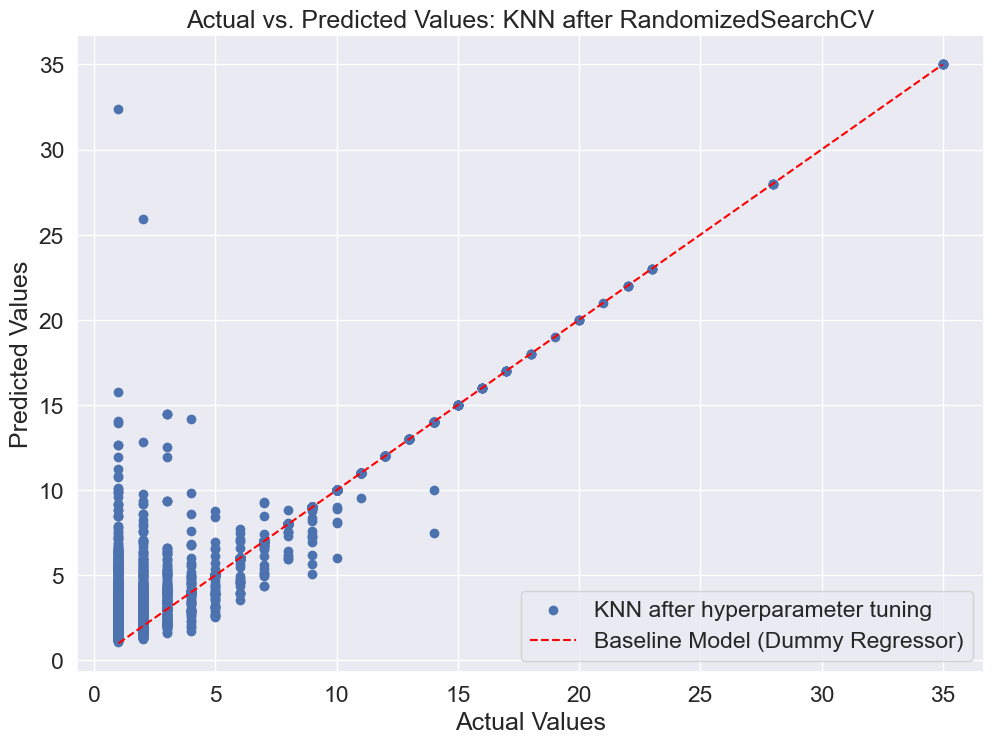

In [284]:
# Import necessary libraries
import matplotlib.pyplot as plt

# ...

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_test_knn_rs, label='KNN after hyperparameter tuning')
plt.plot(baseline_line, baseline_line, color='red', linestyle='--', label='Baseline Model (Dummy Regressor)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values: KNN after RandomizedSearchCV")

# Add a subtitle using plt.figtext
subtitle_text = (print_metrics(y_test, y_pred_test_knn_rs))  # Replace with your subtitle
plt.figtext(0.5, 0.01, subtitle_text, ha="center", fontsize=12, color="blue")

plt.legend()
plt.show()

# Model 6: HistGradientBoostingRegressor

In [246]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Create a HistGradientBoostingRegressor
hist_gradient_boosting = HistGradientBoostingRegressor(random_state=42)

# Fit the model to the training data
hist_gradient_boosting.fit(x_train_trans, y_train)

# Make predictions on the test data
y_pred_histgrad = hist_gradient_boosting.predict(x_test_trans)

print_metrics(y_test, y_pred_histgrad)

Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 1.69
Mean Squared Error (MSE): 5.12
Root Mean Squared Error (RMSE): 2.26
R-squared (R2) Score: 0.65


In [261]:
# Define a hyperparameter grid for RandomizedSearchCV
param_dist = {
    'max_iter': np.arange(50, 501, 50),  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate
    'max_depth': np.arange(3, 21),  # Maximum depth of individual trees
    'min_samples_leaf': np.arange(1, 11),  # Minimum samples per leaf
    'l2_regularization': [0.0, 0.1, 0.2, 0.3]  # L2 regularization term
}

# Create a RandomizedSearchCV object to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=hist_gradient_boosting, param_distributions=param_dist, 
                                   n_iter=20, scoring='neg_mean_squared_error', cv=5, 
                                   random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search.fit(x_train_trans, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Create the final HistGradientBoostingRegressor with the best hyperparameters
best_hist_gradient_boosting = HistGradientBoostingRegressor(**best_params, random_state=42)

# Fit the model to the training data
best_hist_gradient_boosting.fit(x_train_trans, y_train)

# Make predictions on the test data
y_pred_hist_rs = best_hist_gradient_boosting.predict(x_test_trans)

# Evaluate the model
print_metrics(y_test, y_pred_hist_rs)


Best Hyperparameters: {'min_samples_leaf': 1, 'max_iter': 500, 'max_depth': 20, 'learning_rate': 0.2, 'l2_regularization': 0.0}
Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 1.0
Root Mean Squared Error (RMSE): 1.0
R-squared (R2) Score: 0.93


Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 1.0
Root Mean Squared Error (RMSE): 1.0
R-squared (R2) Score: 0.93


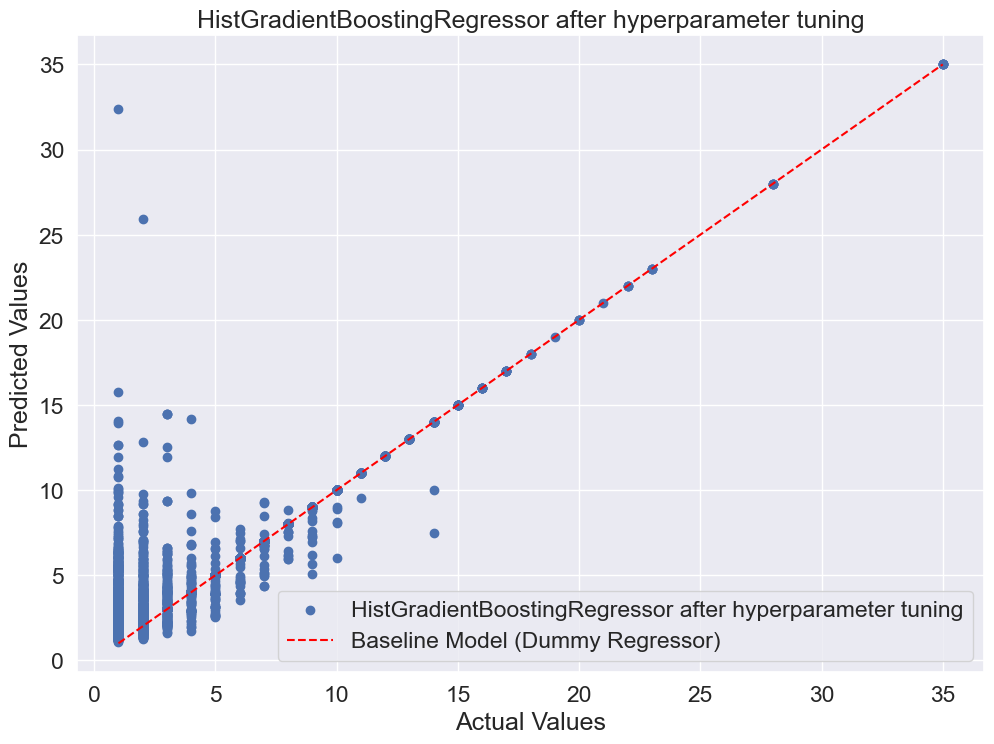

In [285]:
# Import necessary libraries
import matplotlib.pyplot as plt

# ...

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_test_knn_rs, label='HistGradientBoostingRegressor after hyperparameter tuning')
plt.plot(baseline_line, baseline_line, color='red', linestyle='--', label='Baseline Model (Dummy Regressor)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("HistGradientBoostingRegressor after hyperparameter tuning")

# Add a subtitle using plt.figtext
subtitle_text = (print_metrics(y_test, y_pred_hist_rs))  # Replace with your subtitle
plt.figtext(0.5, 0.01, subtitle_text, ha="center", fontsize=12, color="blue")

plt.legend()
plt.show()

# Error Analysis

In [ ]:
import matplotlib.pyplot as plt
custom_colors = ['#8cb8a8', '#ffcc99', '#6b92a9', '#e9dccb', '#ff9999', '#cc99ff', '#ffb6c1', '#a4c3d2' ]

In [ ]:
def error_analysis(y_test, y_pred_test):
    """Generate true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of the model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Calculate the range of values for the residual plot
    min_residual = min(residuals)
    max_residual = max(residuals)
    
    # Plot real vs. predicted values and residuals
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    # True vs. predicted values plot
    ax[0].scatter(y_pred_test, y_test, color='#8cb8a8', alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. Predicted Values", fontsize=16)
    ax[0].set_xlabel("Predicted Values")
    ax[0].set_ylabel("True Values")
    ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    # Residual scatter plot
    ax[1].scatter(y_pred_test, residuals, color='#8cb8a8', alpha=0.7)
    ax[1].plot([-400, 350], [0, 0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("Predicted Values")
    ax[1].set_ylabel("Residuals")
    ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[1].set_ylim((min_residual-10), (max_residual+10))
    
    plt.show()


### Baseline Model: Dummy Regressor

Baseline: Dummy Regressor 


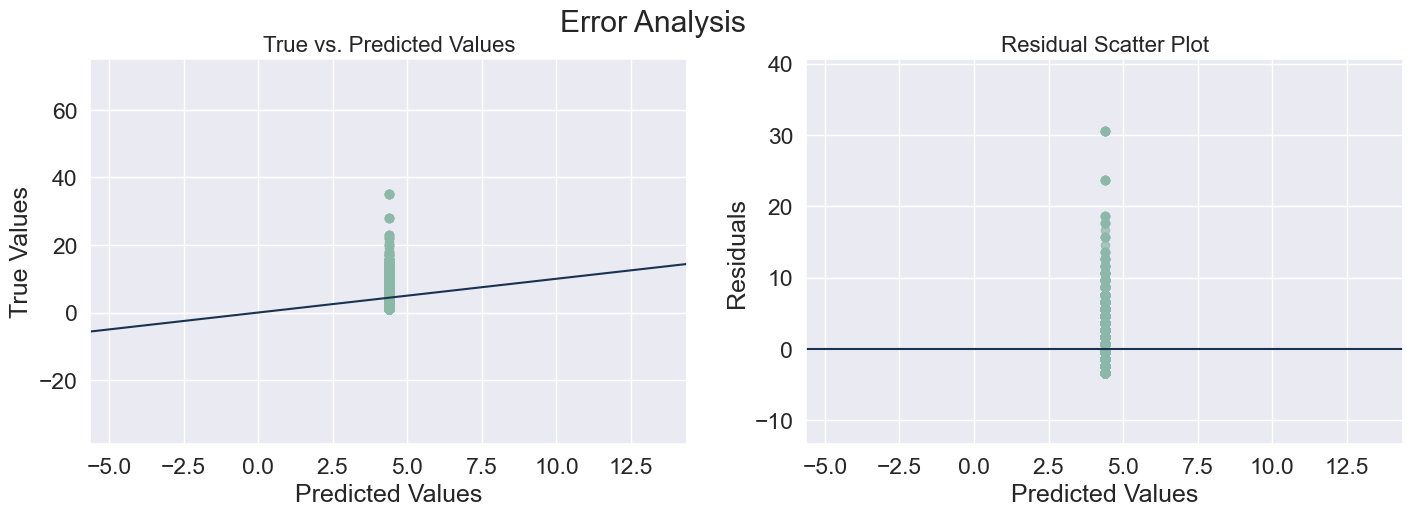

Text(0.5, 0.98, 'Error Analysis Base Model: Dummy Regressor')

<Figure size 1170x827 with 0 Axes>

In [274]:
print("Baseline: Dummy Regressor ")
error_analysis(y_test, y_pred_dr)

### Model 1: Random Forest

#### Model 1: Random Forest before hyperparameter tuning

Model 1: Random Forest


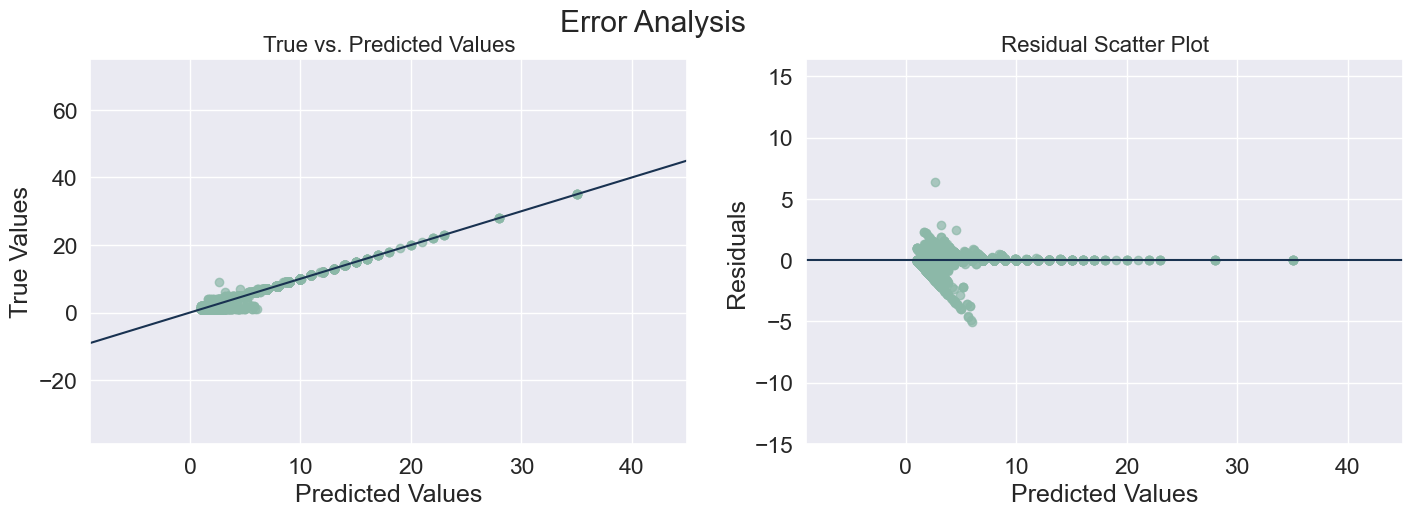

In [249]:
print("Model 1: Random Forest")
error_analysis(y_test, y_pred_rf)

#### Model 1: Random Forest after RandmizedSearchCV

Model 1: Random Forest after simple hyperparameter tuning


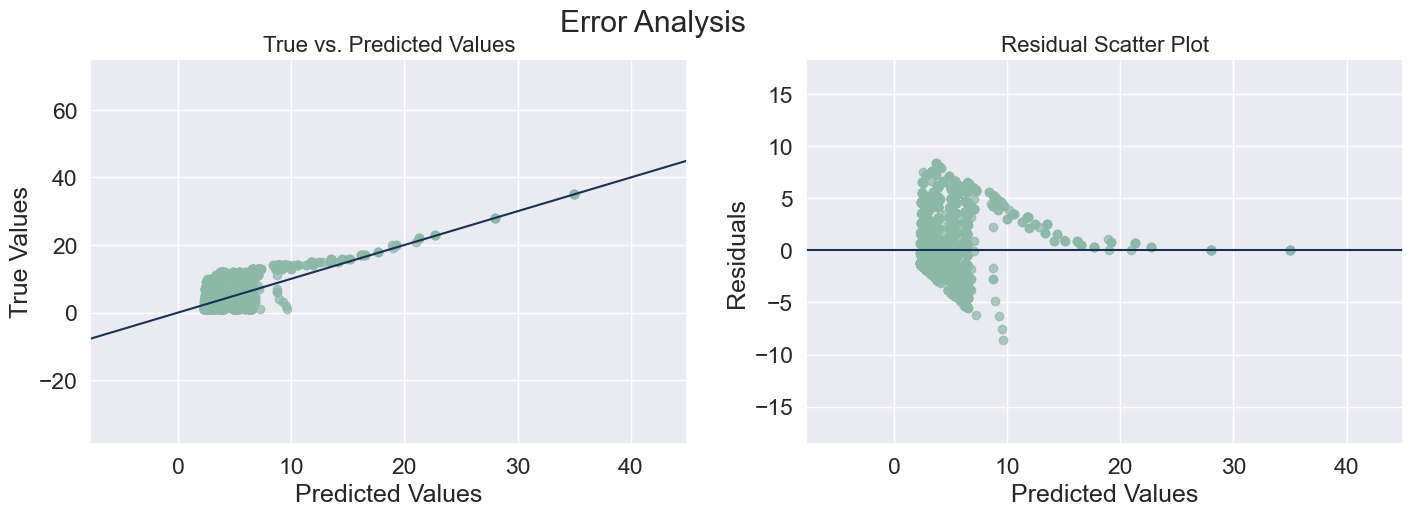

In [250]:
print("Model 1: Random Forest after simple hyperparameter tuning")
error_analysis(y_test, y_pred_test_rs)

#### Model 1: Random Forest after StackingRegressor

Model 1: Random Forest: Stacking Regressor


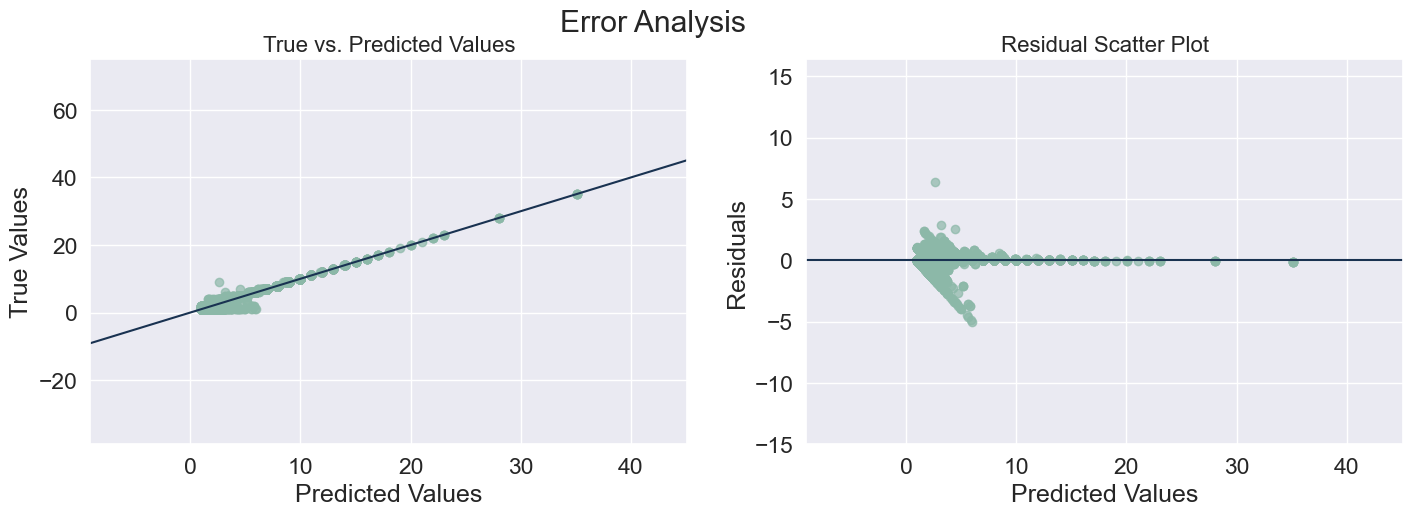

In [251]:
print("Model 1: Random Forest: Stacking Regressor")
error_analysis(y_test, y_pred_stacking)

### Model 2: Ridge Regression

Model 2: Ridge Regression


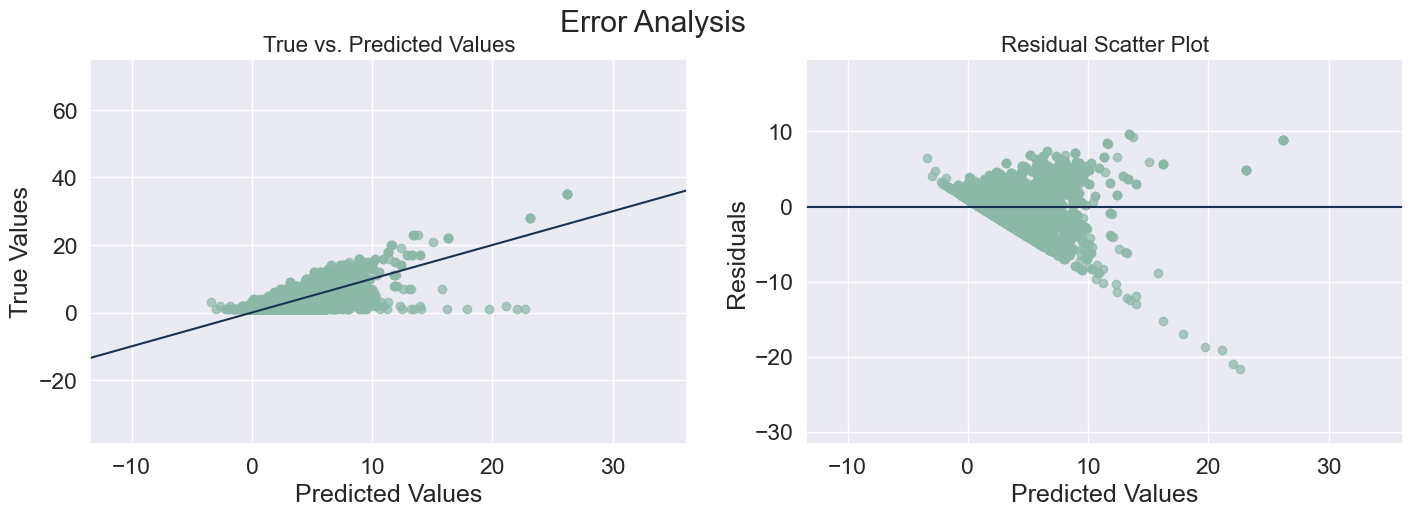

In [252]:
print('Model 2: Ridge Regression')
error_analysis(y_test, y_pred_ridge_01)

### Model 3: Lasso Regression

Model 3: Lasso Regression


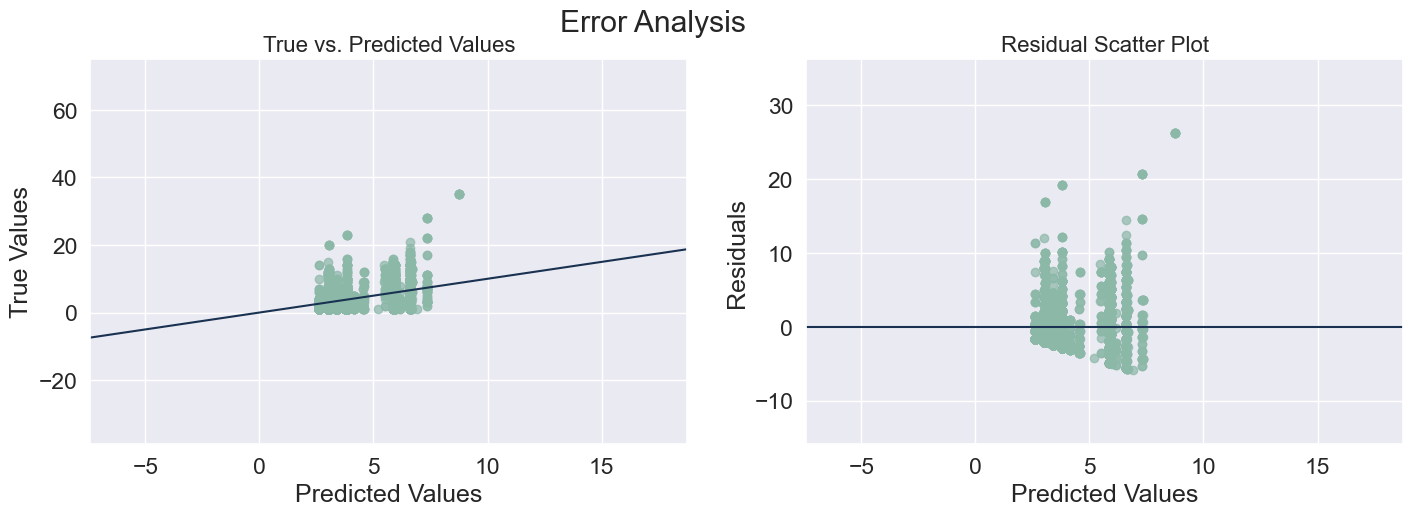

In [253]:
print('Model 3: Lasso Regression')
error_analysis(y_test, y_pred_lasso_005)

### Model 4: Logistic Regression

Model 4: Logistic Regression


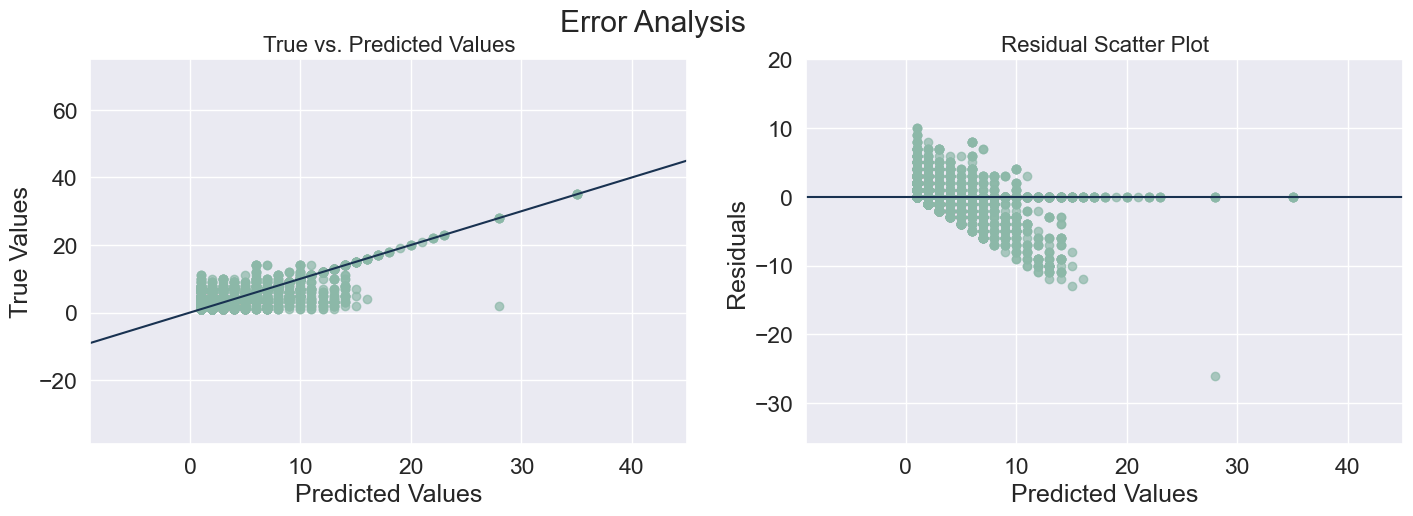

In [254]:
print('Model 4: Logistic Regression')
error_analysis(y_test, y_pred_logreg)

### Model 5: KNNRegressor

#### Model 5: KNNRegressor before hyperparameter tuning

Model 5: KNN Regressor


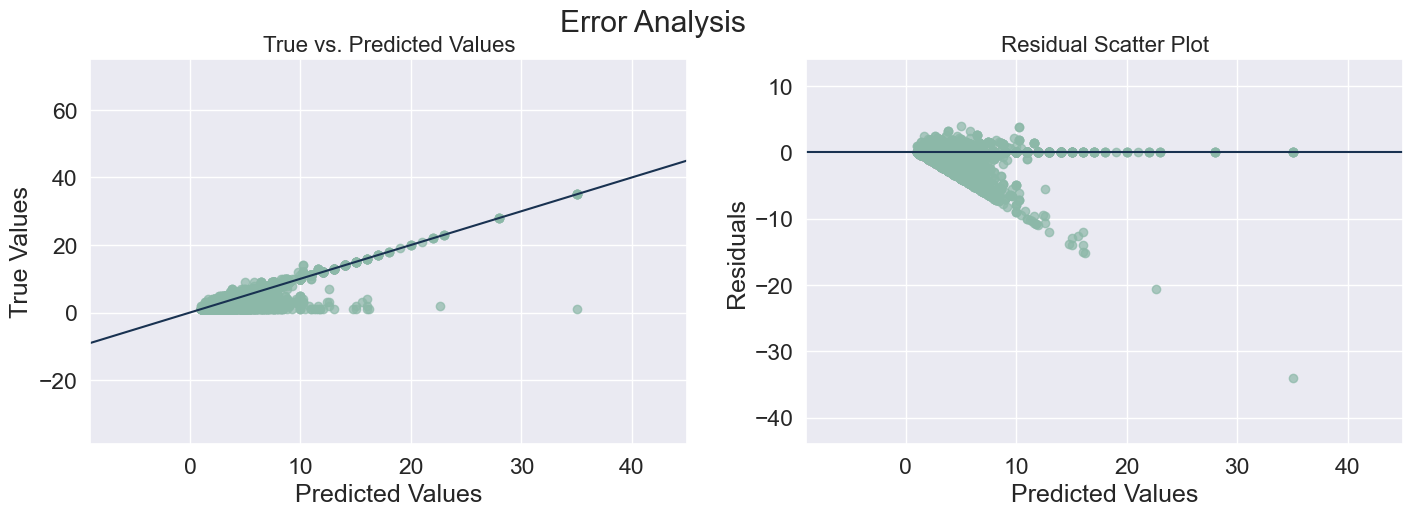

In [255]:
print('Model 5: KNN Regressor')
error_analysis(y_test, knn_y_pred)

#### Model 5: KNNRegressor after hyperparameter tuning

Model 5: KNN Regressor after hyperparameter tuning


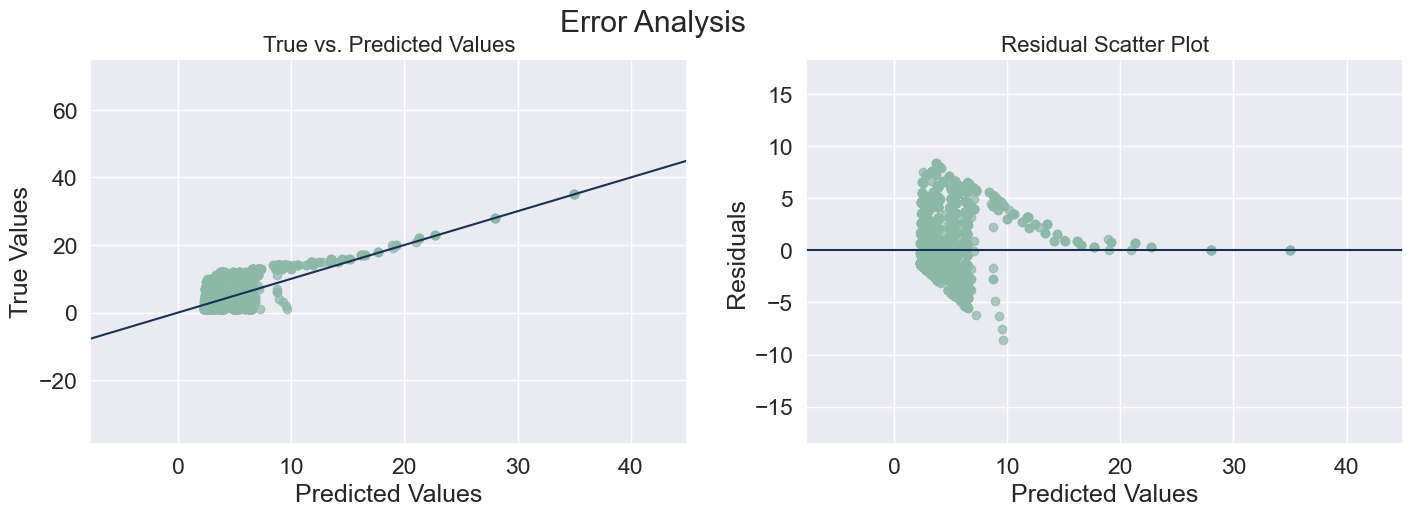

In [256]:
print('Model 5: KNN Regressor after hyperparameter tuning')
error_analysis(y_test, y_pred_test_knn_rs)

### Model 6: HistGradientBoostingRegressor

#### Model 6: HistGradientBoostingRegressor before hyperparameter tuning

Model 6: HistGradientGBoost Regressor


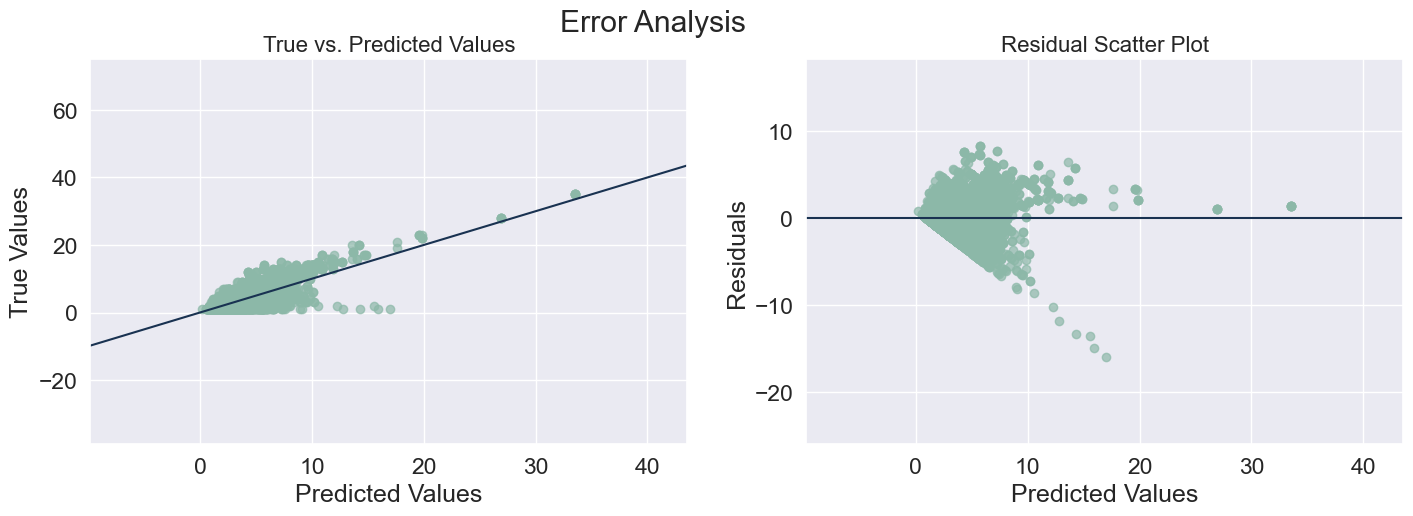

In [257]:
print('Model 6: HistGradientGBoost Regressor')
error_analysis(y_test, y_pred_histgrad)

#### Model 6: HistGradientBoostingRegressor after hyperparameter tuning

Model 6: HistGradientGBoost Regressor


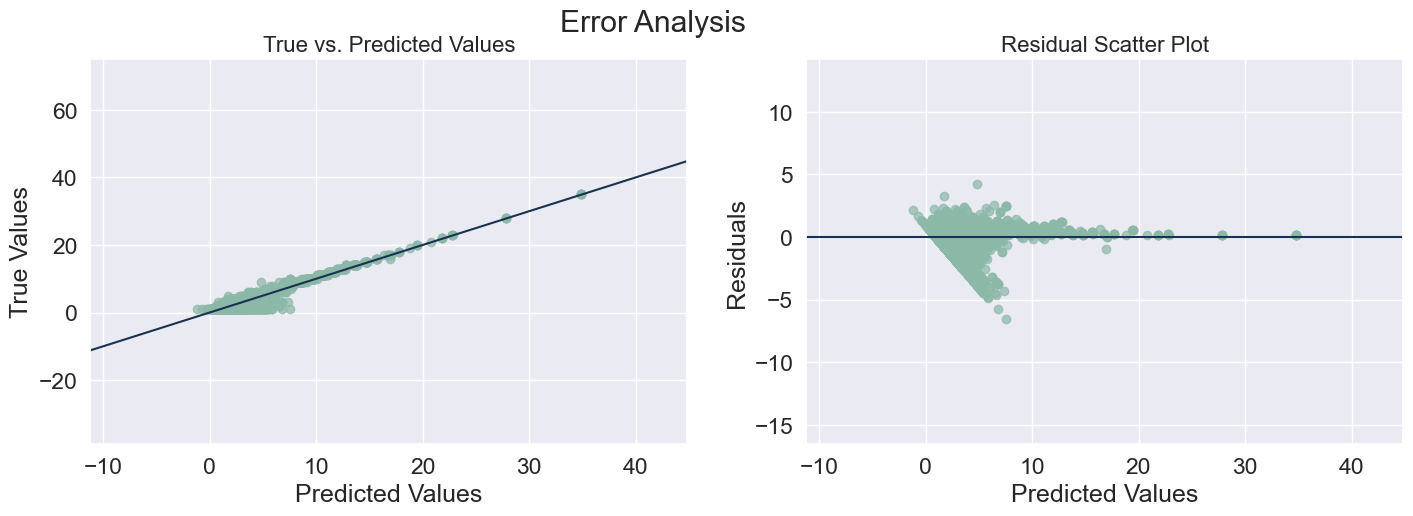

In [262]:
print('Model 6: HistGradientGBoost Regressor after hyperparameter Tuning')
error_analysis(y_test, y_pred_hist_rs)

# Comparison of all models

Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 1.0
Root Mean Squared Error (RMSE): 1.0
R-squared (R2) Score: 0.93
Baseline: RSME Dummy Regressor: 3.82
Mean Absolute Error (MAE): 0.81
Mean Squared Error (MSE): 3.3
Root Mean Squared Error (RMSE): 1.82
R-squared (R2) Score: 0.77


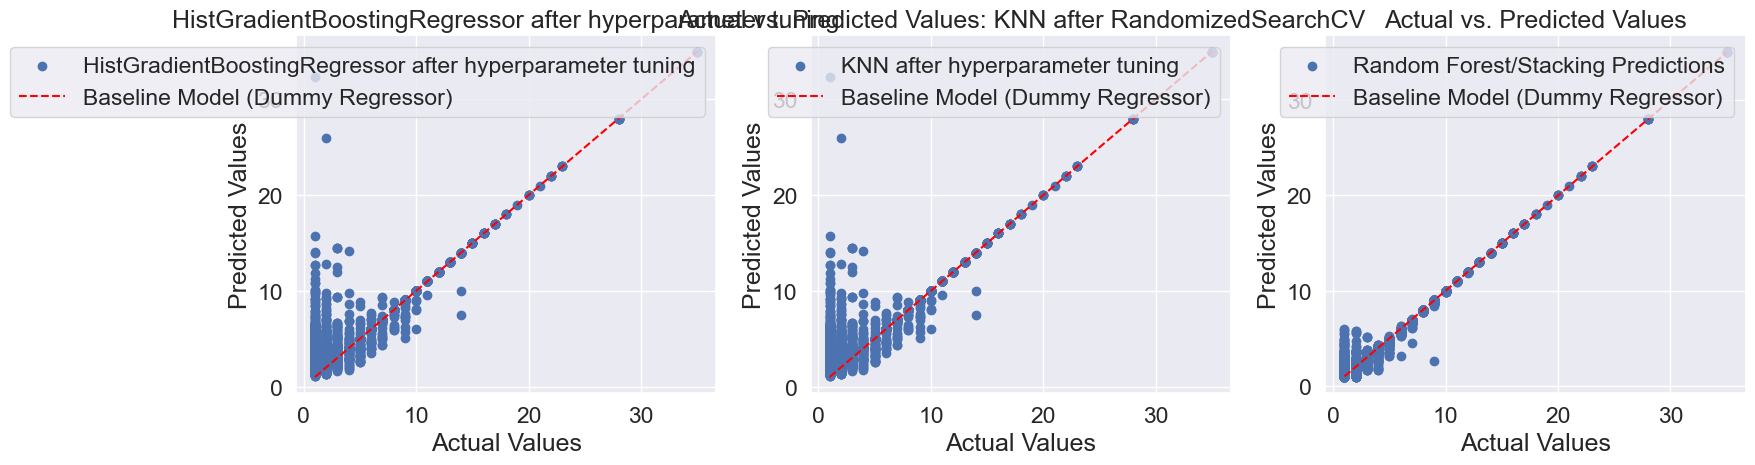

In [286]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns of subplots

# Plot 1 - HistGradientBoostingRegressor
axes[0].scatter(y_test, y_pred_test_knn_rs, label='HistGradientBoostingRegressor after hyperparameter tuning')
axes[0].plot(baseline_line, baseline_line, color='red', linestyle='--', label='Baseline Model (Dummy Regressor)')
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("HistGradientBoostingRegressor after hyperparameter tuning")

# Add a subtitle using text
subtitle_text1 = print_metrics(y_test, y_pred_hist_rs)  # Replace with your subtitle
axes[0].text(0.5, 0.01, subtitle_text1, ha="center", fontsize=12, color="blue")

axes[0].legend()

# Plot 2 - KNN
axes[1].scatter(y_test, y_pred_test_knn_rs, label='KNN after hyperparameter tuning')
axes[1].plot(baseline_line, baseline_line, color='red', linestyle='--', label='Baseline Model (Dummy Regressor)')
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].set_title("Actual vs. Predicted Values: KNN after RandomizedSearchCV")

# Add a subtitle using text
subtitle_text2 = print_metrics(y_test, y_pred_test_knn_rs)  # Replace with your subtitle
axes[1].text(0.5, 0.01, subtitle_text2, ha="center", fontsize=12, color="blue")

axes[1].legend()

# Plot 3 - Stacking
axes[2].scatter(y_test, y_pred_stacking, label='Random Forest/Stacking Predictions')
axes[2].plot(baseline_line, baseline_line, color='red', linestyle='--', label='Baseline Model (Dummy Regressor)')
axes[2].set_xlabel("Actual Values")
axes[2].set_ylabel("Predicted Values")
axes[2].set_title("Actual vs. Predicted Values")

axes[2].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


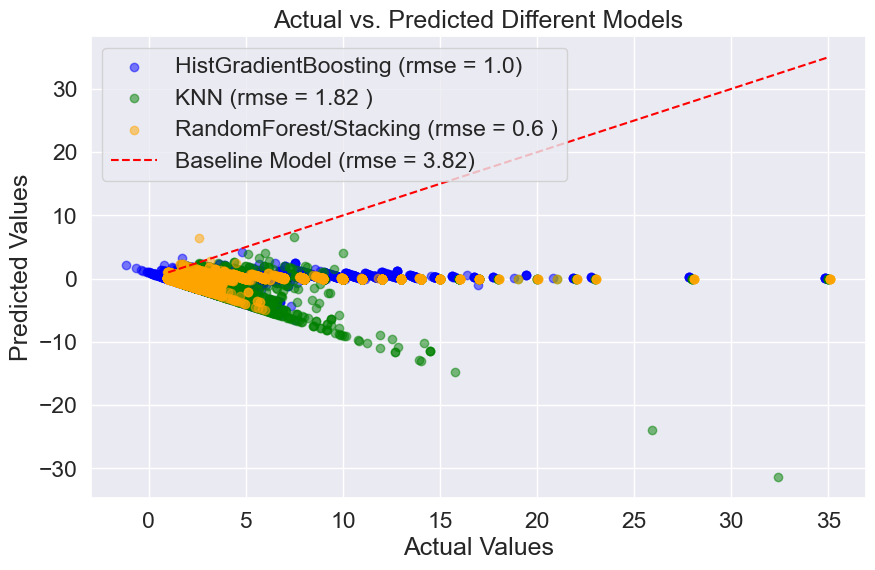

In [296]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the residuals for each model
residuals_hist = y_test - y_pred_hist_rs
residuals_knn = y_test - y_pred_test_knn_rs
residuals_stacking = y_test - y_pred_stacking

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the residuals for each model with different colors
ax.scatter(y_pred_hist_rs, residuals_hist, label='HistGradientBoosting (rmse = 1.0)', alpha=0.5, color='blue')
ax.scatter(y_pred_test_knn_rs, residuals_knn, label='KNN (rmse = 1.82 )', alpha=0.5, color='green')
ax.scatter(y_pred_stacking, residuals_stacking, label='RandomForest/Stacking (rmse = 0.6 )', alpha=0.5, color='orange')

# Add the baseline model line to the existing plot
ax.plot(baseline_line, baseline_line, color='red', linestyle='--', label='Baseline Model (rmse = 3.82)')


# Set labels and title
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
ax.set_title("Actual vs. Predicted Different Models")

# Add legend
ax.legend(loc='upper left')

# Show the plot
plt.show()


In [271]:
print("Baseline: Dummy Regressor ")
print_rmse(y_test, y_pred_dr)

print('---------------------------------')

print("Model 1: best performing Random Forest")
print_rmse(y_test, y_pred_rf)

print('---------------------------------')
print("Model 1: Random Forest after hyperparameter tuning (RandomizedSearchCV)")
print_rmse(y_test, y_pred_test_rs)

print('---------------------------------')

print("Model 1: Random Forest: Stacking Regressor")
print_rmse(y_test, y_pred_stacking)

Baseline: Dummy Regressor 
Root Mean Squared Error (RMSE): 3.82
---------------------------------
Model 1: best performing Random Forest
Root Mean Squared Error (RMSE): 0.61
---------------------------------
Model 1: Random Forest after hyperparameter tuning (RandomizedSearchCV)
Root Mean Squared Error (RMSE): 2.43
---------------------------------
Model 1: Random Forest: Stacking Regressor
Root Mean Squared Error (RMSE): 0.6


In [269]:
print('Model 2: Ridge Regression')
print_rmse(y_test, y_pred_ridge_01)

print('---------------------------------')

print('Model 3: Lasso Regression')
print_rmse(y_test, y_pred_lasso_005)

print('---------------------------------')

print('Model 4: Logistic Regression')
print_rmse(y_test, y_pred_logreg)

print('---------------------------------')

Model 2: Ridge Regression
Root Mean Squared Error (RMSE): 2.67
---------------------------------
Model 3: Lasso Regression
Root Mean Squared Error (RMSE): 3.39
---------------------------------
Model 4: Logistic Regression
Root Mean Squared Error (RMSE): 2.63
---------------------------------


In [292]:
print('Model 5: KNN Regressor before hyperparameter tuning')
print_rmse(y_test, knn_y_pred)

print('---------------------------------')

print('Model 5: KNN Regressor after hyperparameter tuning (RandomizedSearchCV)')
print_rmse(y_test, y_pred_test_knn_rs)

print('---------------------------------')

print('Model 6: HistGradientGBoost Regressor before hyperparameter Tuning')
print_rmse(y_test, y_pred_histgrad)

print('---------------------------------')

print('Model 6: HistGradientGBoost Regressor after hyperparameter Tuning (RandomizedSearchCV)')
print_rmse(y_test, y_pred_hist_rs)


Model 5: KNN Regressor before hyperparameter tuning
Root Mean Squared Error (RMSE): 2.12
---------------------------------
Model 5: KNN Regressor after hyperparameter tuning (RandomizedSearchCV)
Root Mean Squared Error (RMSE): 1.82
---------------------------------
Model 6: HistGradientGBoost Regressor before hyperparameter Tuning
Root Mean Squared Error (RMSE): 2.26
---------------------------------
Model 6: HistGradientGBoost Regressor after hyperparameter Tuning (RandomizedSearchCV)
Root Mean Squared Error (RMSE): 1.0
